# Abstract

The following project aims to predict the selling price/value of a car based on mileage, seller type, transmission, age, number of owners and original price. It utilizes a linear regression model that is trained on a dataset with 301 datapoints, 80% of which are used as training data while the other 20% is used to test the model. 


In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

car_data = pd.read_csv('car_prediction_data.csv')

car_data = car_data.drop('Car_Name', axis=1)
current_year = 2024
car_data['car_age'] = current_year - car_data['Year']

car_data = car_data.drop('Year', axis=1)

# Convert columns to numeric data types


print(car_data.head())
car_data.shape

   Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  car_age  
0       Manual      0       10  
1       Manual      0       11  
2       Manual      0        7  
3       Manual      0       13  
4       Manual      0       10  


(301, 8)

### Descriptive Statistics

In [2]:
car_data = car_data.drop(['Transmission', 'Seller_Type', 'Fuel_Type'], axis=1)

car_data.describe()




,Selling_Price,Present_Price,Kms_Driven,Owner,car_age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,10.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,6.000000
25%,0.900000,1.200000,15000.000000,0.000000,8.000000
50%,3.600000,6.400000,32000.000000,0.000000,10.000000
75%,6.000000,9.900000,48767.000000,0.000000,12.000000
max,35.000000,92.600000,500000.000000,3.000000,21.000000


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

# Fit the model
model = sm.OLS(y_train.values, sm.add_constant(X_train.values))
results = model.fit()

# Make predictions on the test data
y_pred_test = results.predict(sm.add_constant(X_test.values))

# Calculate evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)


# Print the evaluation metrics
print('Mean Squared Error (Test):', mse_test)
print('Mean Absolute Error (Test):', mae_test)



# Print out the statistics
print(results.summary())

Mean Squared Error (Test): 4.122560047931043
Mean Absolute Error (Test): 1.3939672804922012
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     354.7
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           2.73e-98
Time:                        19:27:17   Log-Likelihood:                -499.37
No. Observations:                 240   AIC:                             1009.
Df Residuals:                     235   BIC:                             1026.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

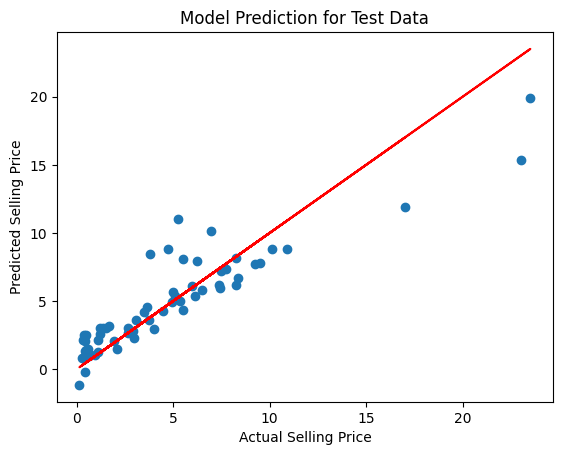

In [4]:
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, color='red')  # Add the line y=x
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Model Prediction for Test Data')
plt.show()


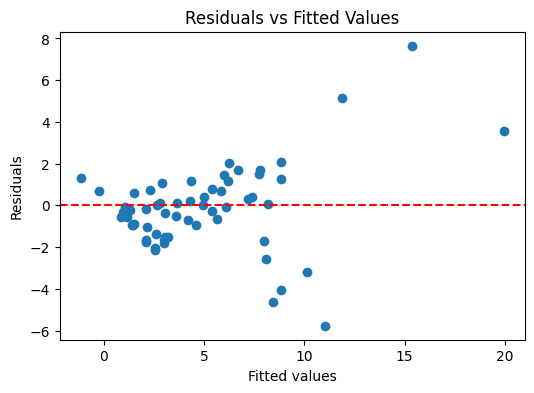

In [5]:
residuals = y_test - y_pred_test
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_test, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()



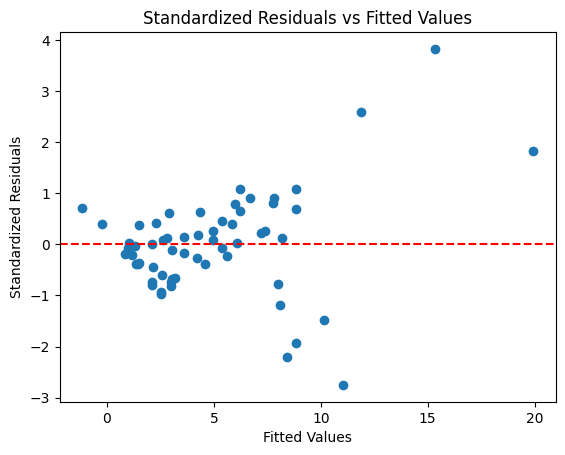

In [6]:
# Calculate standardized residuals
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

# Create a scatter plot
plt.scatter(y_pred_test, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted Values')

# Plot a horizontal line at y = 0
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

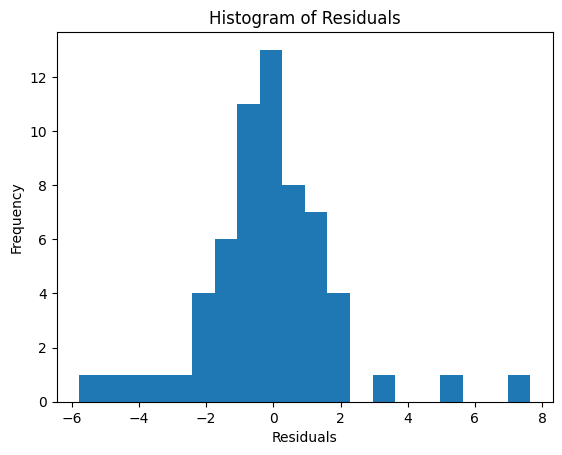

In [7]:

# Check normality (histogram of residuals)
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


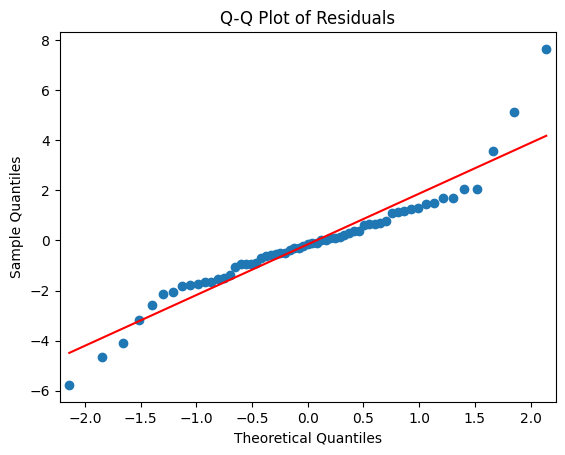

In [8]:

# Check normality (Q-Q plot of residuals)
sm.qqplot(residuals, line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()


C:\Users\arnav\AppData\Local\Temp\ipykernel_33756\342749145.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)


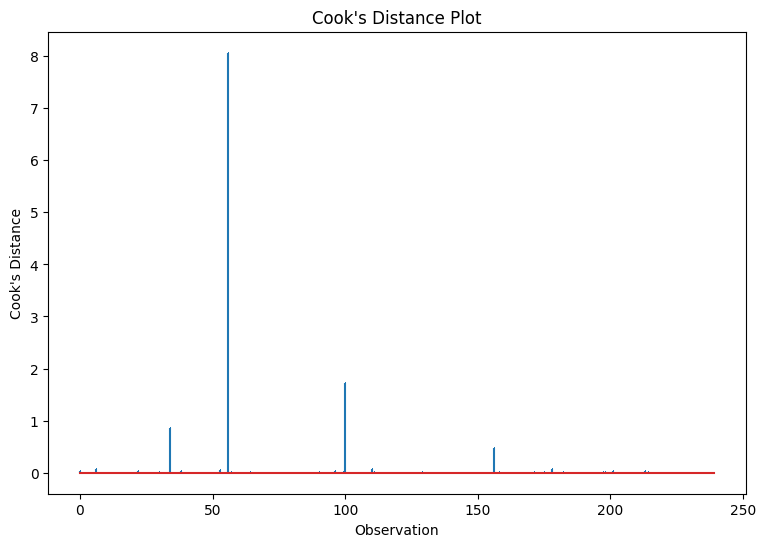

[0, 6, 22, 34, 38, 53, 56, 96, 100, 110, 156, 178, 201, 213]


In [9]:
from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np

# Calculate the Cook's Distance
influence = OLSInfluence(results)
(c, p) = influence.cooks_distance

# Plot the Cook's Distance
plt.figure(figsize=(9, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation")
plt.ylabel("Cook's Distance")
plt.show()

# Set the threshold for Cook's Distance
threshold = 4 / (len(X_train) -2)

# Identify the outliers
outliers = [i for i, cook_distance in enumerate(c) if cook_distance > threshold]

# Print the list of outlier observations
print(outliers)


Int64Index([  0,   6,  16,  22,  31,  36,  38,  53,  56,  57,  64,  85,  90,
             93,  96,  99, 100, 102, 110, 111, 129, 146, 153, 156, 158, 159,
            170, 178, 197, 200, 201, 207, 213, 214, 219],
           dtype='int64')
Int64Index([  0,   2,   5,   6,  21,  22,  28,  30,  34,  35,  38,  40,  43,
             45,  53,  56,  64,  66,  69,  83,  96,  99, 100, 107, 110, 132,
            149, 156, 171, 175, 177, 178, 182, 187, 190, 192, 198, 201, 202,
            210, 211, 213, 217, 224, 229, 232, 237],
           dtype='int64')
47


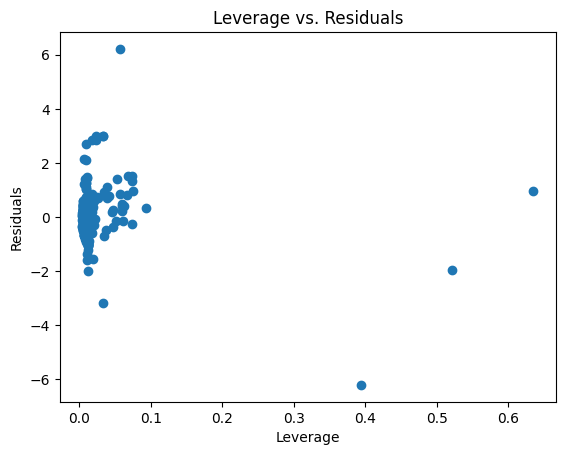

In [10]:
import numpy as np
# Calculate residuals
residuals = results.resid
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

# Calculate leverages
influence = results.get_influence()
leverage = influence.hat_matrix_diag

outliers_sr = X_train[(residuals < -2) | (residuals > 2)]
print(outliers_sr.index)

outliers_lv = X_train[leverage > 4/240]
print(outliers_lv.index)
print(len(outliers_lv.index))

# Plot residuals against leverage
plt.scatter(leverage, standardized_residuals)
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Leverage vs. Residuals')
plt.show()




In [22]:
# Remove the 'Kms_Driven' column from X_train and X_test
X_train_no_kms = X_train.drop('Kms_Driven', axis=1)
X_test_no_kms = X_test.drop('Kms_Driven', axis=1)

# Rebuild the model without the 'Kms_Driven' variable
model_no_kms = sm.OLS(y_train, sm.add_constant(X_train_no_kms)).fit()

# Make predictions on the test data
y_pred_test_no_kms = model_no_kms.predict(sm.add_constant(X_test_no_kms))

# Calculate evaluation metrics
mse_test_no_kms = mean_squared_error(y_test, y_pred_test_no_kms)
mae_test_no_kms = mean_absolute_error(y_test, y_pred_test_no_kms)

# Print the model summary
print(model_no_kms.summary())
print('Mean Squared Error (Test):', mse_test_no_kms)
print('Mean Absolute Error (Test):', mae_test_no_kms)


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     474.8
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           1.18e-99
Time:                        20:24:21   Log-Likelihood:                -499.39
No. Observations:                 240   AIC:                             1007.
Df Residuals:                     236   BIC:                             1021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2511      0.483     10.861

In [23]:
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error, mean_absolute_error

anova_results = anova_lm(model_no_kms,results)
print(anova_results)



   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     236.0  901.791740      0.0       NaN       NaN       NaN
1     235.0  901.573737      1.0  0.218002  0.056823  0.811797


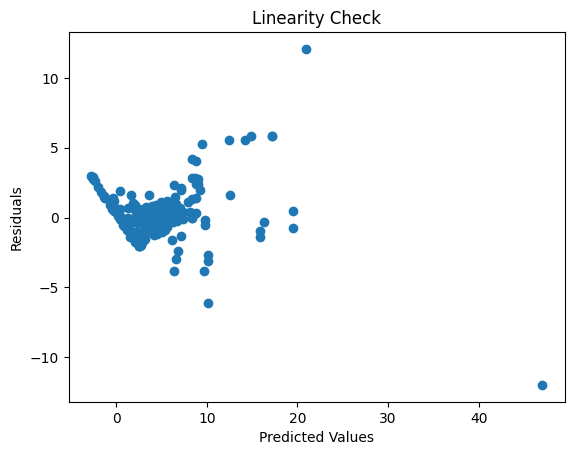

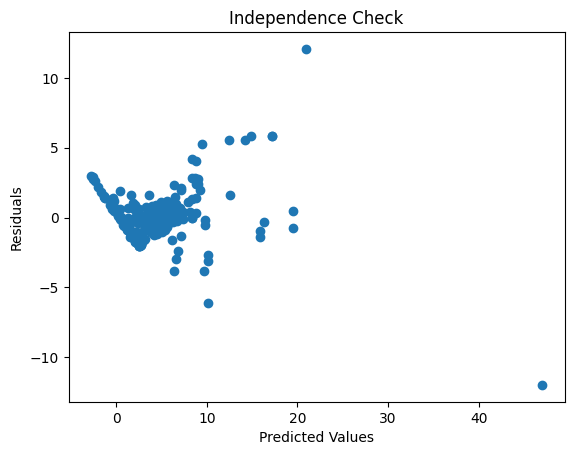

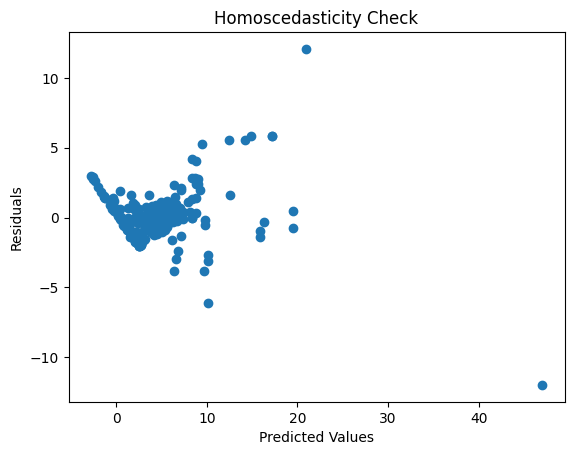

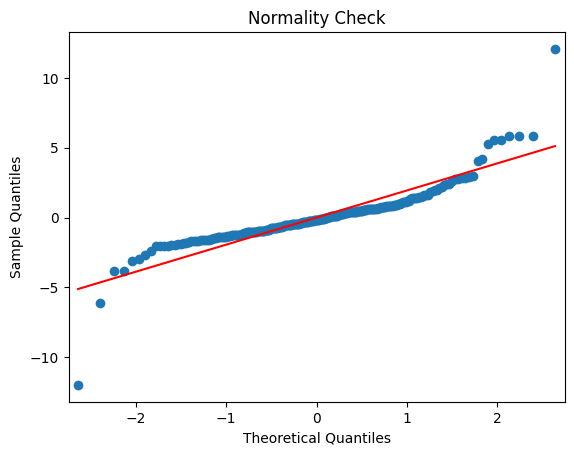

         Feature       VIF
0  Present_Price  1.760917
1     Kms_Driven  2.474603
2          Owner  1.049683
3        car_age  2.929797


In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check linearity of the relationship
plt.scatter(model_no_kms.fittedvalues, model_no_kms.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

# Check independence of residuals
plt.scatter(model_no_kms.fittedvalues, model_no_kms.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Independence Check')
plt.show()

# Check homoscedasticity of residuals
plt.scatter(model_no_kms.fittedvalues, model_no_kms.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Check normality of residuals
sm.qqplot(model_no_kms.resid, line='s')
plt.title('Normality Check')
plt.show()

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)



## Redo Model without outliers and KMS Driven dropped


In [11]:
# Remove the outliers
car_data_no_outliers = car_data.loc[~car_data.index.isin(outliers)]

# Split the data into training and test sets
# Rebuild the regression model without outliers
print(car_data.columns)

X_no_outliers = car_data_no_outliers.drop(['Selling_Price','Kms_Driven'], axis=1)
y_no_outliers = car_data_no_outliers['Selling_Price']

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

y_train_no_outliers = y_train_no_outliers.reset_index(drop=True)
X_train_no_outliers = X_train_no_outliers.reset_index(drop=True)

# Fit the model without outliers
model_no_outliers = sm.OLS(y_train_no_outliers.values, sm.add_constant(X_train_no_outliers.values))
results_no_outliers = model_no_outliers.fit()

# Make predictions on the test data without outliers
y_pred_test_no_outliers = results_no_outliers.predict(sm.add_constant(X_test_no_outliers.values))

# Calculate evaluation metrics without outliers
mse_test_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_test_no_outliers)
mae_test_no_outliers = mean_absolute_error(y_test_no_outliers, y_pred_test_no_outliers)

# Print the evaluation metrics without outliers
print('Mean Squared Error (Test) without outliers:', mse_test_no_outliers)
print('Mean Absolute Error (Test) without outliers:', mae_test_no_outliers)

# Print out the statistics without outliers
print(results_no_outliers.summary())



Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'car_age'], dtype='object')
Mean Squared Error (Test) without outliers: 4.89384689453941
Mean Absolute Error (Test) without outliers: 1.5711703986209018
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     404.0
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           2.83e-90
Time:                        19:27:18   Log-Likelihood:                -473.63
No. Observations:                 229   AIC:                             955.3
Df Residuals:                     225   BIC:                             969.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                   

In [13]:
from statsmodels.stats.anova import anova_lm

# Perform ANOVA test
anova_results = anova_lm(results, results_no_outliers)

# Print the ANOVA table
print(anova_results)


   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0     235.0  901.573737      0.0        NaN       NaN       NaN
1     225.0  839.117915     10.0  62.455823  1.674682  0.087786


In [ ]:
# Linearity
plt.scatter(X_train['Present_Price'], y_train)
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.title('Scatter plot of Present_Price vs Selling_Price')
plt.show()

# Independence
residuals = results.resid
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

# Homoscedasticity
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Normality
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

# No multicollinearity
correlation_matrix = X_train.corr()
print(correlation_matrix)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif)
